In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [6]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,-1.235200
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,NaN,-1.031400
...,...,...
3995,0.89265,0.278030
3996,0.74741,NaN
3997,NaN,0.085708
3998,0.70388,0.351420


In [7]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	392
float64		column 2	364


In [8]:
df.describe()

,column 1,column 2
count,3608.000000,3636.000000
mean,0.010192,0.003701
std,0.728190,0.727412
min,-1.714600,-1.376500
25%,-0.507110,-0.534795
50%,0.024330,0.005947
75%,0.566457,0.552115
max,1.363900,1.344400


<AxesSubplot:>

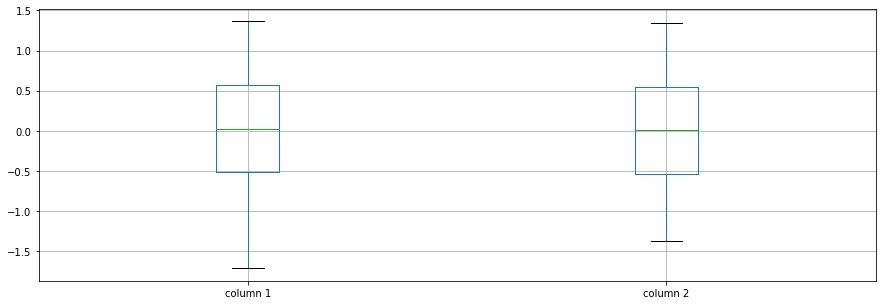

In [9]:
df.boxplot(return_type='axes', figsize=(15,5))

In [10]:
df.mean()

column 1    0.010192
column 2    0.003701
dtype: float64

In [11]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.00000,0.00432
column 2,0.00432,1.00000


In [12]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [13]:
imputer = md.Midas(layer_structure = [2,2+43,2+43+43,2+43+43+43,2+43+43+43+43,2+43+43+43,2+43+43,2+43,2], vae_layer = False, seed = 43)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.3059375252723693
Epoch: 1 , loss: 1.3072180540561675
Epoch: 2 , loss: 1.3070703098773957
Epoch: 3 , loss: 1.3064388279914856
Epoch: 4 , loss: 1.3072720856666564
Epoch: 5 , loss: 1.3068441576957703
Epoch: 6 , loss: 1.3042759532928467
Epoch: 7 , loss: 1.3061876945495605
Epoch: 8 , loss: 1.3070618081092835
Epoch: 9 , loss: 1.3064772944450378
Epoch: 10 , loss: 1.3053636384010314
Epoch: 11 , loss: 1.3069448676109314
Epoch: 12 , loss: 1.306648202419281
Epoch: 13 , loss: 1.3086998510360717
Epoch: 14 , loss: 1.3067178177833556
Epoch: 15 , loss: 1.304508641242981
Epoch: 16 , loss: 1.3041553783416748
Epoch: 17 , loss: 1.3059296312332154
Epoch: 18 , loss: 1.3047006828784942
Epoch: 19 , loss: 1.30709800863266
Epoch: 20 , loss: 1.306153146982193
Epoch: 21 , loss: 1.3071099619865418
Epoch: 22 , loss: 1.3073948893547058
Epoch: 23 , loss: 1.3061895642280579
Epoch: 24 , loss: 1.307323338985443
Epoch: 25 , loss: 1.3068

In [14]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [15]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.007083
column 2   -1.258200
Name: 21, dtype: float64

In [16]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [17]:
new_df-complete_df

,column 1,column 2
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,-0.121207,0.000000
...,...,...
3995,0.000000,0.000000
3996,0.000000,-0.426438
3997,-1.069517,0.000000
3998,0.000000,0.000000


Calculating NRMSE Value

In [18]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [19]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [20]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(19.496269126015342, 64.9340549279942)

In [21]:
NRMS=numerator/denominator
NRMS


0.3002472146185062

In [22]:
new_df.iloc[66,:]

column 1    0.12305
column 2   -1.03610
Name: 66, dtype: float64

In [23]:
imputations[-1]


,column 1,column 2
0,-0.458660,-1.235200
1,0.243480,-0.873130
2,0.250710,-0.808030
3,0.214620,-0.951980
4,0.007083,-1.031400
...,...,...
3995,0.892650,0.278030
3996,0.747410,0.002092
3997,0.007083,0.085708
3998,0.703880,0.351420


In [24]:
imputations[-1].to_excel("CNP_C_10(imp).xlsx", index=False, header=False)